In [1]:
import numpy as np
from numpy.linalg import norm, solve, multi_dot
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar


"""
@def   : objective function 
@param : x is vector 
@return: a scalar
"""
def objective_func(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

"""
@def   : gradient of objective function 
@param : x is vector 
@return: a vector 
"""
def grad_objective_func(x):
    return np.array([
        -400 * x[0] * (x[1] - x[0] ** 2) - 2 * (1 - x[0]),
        200 * (x[1] - x[0]**2)      
    ])


def hessian_func(x):
    return np.matrix([
        [-400*(x[1] - 3*x[0]**2) + 2, -400 * x[0]], [-400 * x[0], 200]
    ])


# The stopping criteria is the gradient is less than 1e-9.

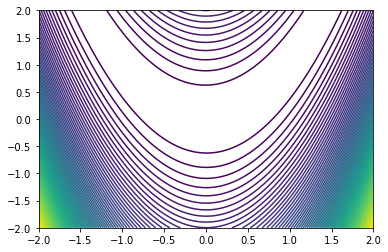

In [2]:
# contour plot of objective function
# additional code: contour plots for objective function

# set the region to plot on
x = np.linspace(-2, 2, 500)
y = np.linspace(-2, 2, 500)
X, Y = np.meshgrid(x, y)

# evaluate function
Z = objective_func([X,Y])

# contour plots of objective function, with 15 contour lines.
plt.contour(X, Y, Z, 90);
# plt.contour(X, Y, Z, 15, colors='black'); # only black color

In [3]:
tol = 1e-9

def exact_line_search_quasi_newton(update_method, x0, H0):
    k = 0
    xcoords = [x0[0]]
    ycoords = [x0[1]]
    x_k = x0 
    H_k = H0 
    g_k = grad_objective_func(x_k)
    while norm(g_k) > tol:
        p_k = -np.matmul(H_k, g_k)                # search direction
   
        def subproblem1D(alpha):                  # for exact line search
            return objective_func(x_k + alpha * p_k)
        
        res = minimize_scalar(subproblem1D)
        alpha_k = res.x 

        s_k     = alpha_k * p_k                   # s_k = x_{k+1} - x_k 
        g_k1    = grad_objective_func(x_k + s_k)  # gk1 is g_{k+1}
        y_k     = g_k1 - g_k                      # y_k = g_{k+1} - g_(k)
        
        k = k + 1                                 # increment.
        """
        Here we transform matrix to ndarray, using .A 
        For interested readers. Here is the manual.
        see https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.matrix.html
        """
        H_k = update_method(H_k, s_k, y_k).A      
        x_k = x_k + s_k 
        g_k = g_k1
        
        xcoords.append(x_k[0])
        ycoords.append(x_k[1])
        
    return x_k, k, norm(g_k), xcoords, ycoords

In [4]:
def SR1(H, s_k, y_k):
    z = s_k - np.dot(H, y_k) 
    # the numerator is a matrix!
    numer = np.matrix(z).T * np.matrix(z)
    denom = np.dot(z, y_k)
    # when the denominator is too small, we skip the iteration.
    if np.abs(denom) < 10**(-8) * norm(z) * norm(y_k):
        return H
    else:
        return H + numer/denom 

In [5]:
x0 = np.array([1.2, -1])
H0 = np.eye(2)

x, iter_number, err, xcoords, ycoords = exact_line_search_quasi_newton(SR1, x0, H0)

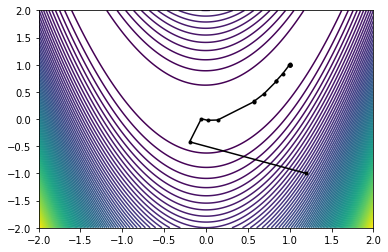

In [6]:
# contour plot of objective function
# additional code: contour plots for objective function

# set the region to plot on
x = np.linspace(-2, 2, 500)
y = np.linspace(-2, 2, 500)
X, Y = np.meshgrid(x, y)

# evaluate function
Z = objective_func([X,Y])

plt.contour(X, Y, Z, 90);
plt.plot(xcoords, ycoords, '-k', marker='.')